# Os santos da Itália - onde nasceram ou morreram?

Este notebook foi desenvolvido após se fazer uma leitura sobre os santos italianos e sobre os santos franceses na Wikipedia e verificar-se que uma grande parte dos locais de nascimento/morte eram comuns.<br>
Resolveu-se fazer uma análise de onde nasceram e onde morreram, com base em 2 critérios de granularidade: cidade (as chamadas <i>comune</i> em italiano) e região (granularidade similar à dos Estados no Brasil). Nesta análise, foram consideradas 7903 <i>comune</i> (cidades) e todas as 20 regiões do país.<br>
<br>
Alguns conhecimentos que foram desenvolvidos para se construir este notebook:
- Coleta de dados em fontes públicas<br>
- Como encontrar na rede mapas em formato shapefile e utilizá-los para análise<br>
- Como explorar e manipular mapas com a biblioteca `geopandas` no Python<br>
- Análise exploratória de dados geográficos<br>
- Alguns dos principais métodos da biblioteca `pandas` para agregação, manipulação e limpeza de tabelas<br>
- Como melhorar a plotagem de mapas gerados pela biblioteca `geopandas` a partir das propriedades da biblioteca `matplotlib`
- Operações com geometrias: `unary_union` e `centroid`

# Importação das bibliotecas

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Importação das bases de dados

Fonte dos arquivos Shapefile (.shp): <br>https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/Limiti01012021_g.zip
<br>
<br>Site principal: <br><b>CONFINI DELLE UNITÀ AMMINISTRATIVE A FINI STATISTICI AL 1° GENNAIO 2021</b>
<br>https://www.istat.it/it/archivio/222527

In [2]:
# Importação do mapa das regiões
gpd_it_reg = gpd.read_file('mapas/Limiti01012021/Reg01012021/Reg01012021_WGS84.shp', encoding='utf-8')

# Importação do mapa das cidades
gpd_it_com = gpd.read_file('mapas/Limiti01012021/Com01012021/Com01012021_WGS84.shp', encoding='utf-8')

# Importação da lista dos santos
df_santos = pd.read_csv('bases/Santos_Italianos.csv', encoding='utf-8')

As 2 bases de dados geográficos (contendo as geometrias) estão dentro dos mesmos sistemas de coordenadas?<br>
Caso não estejam, deve-se aqui deixá-los dentro do mesmo sistema de coordenadas.

In [3]:
if (gpd_it_reg.crs == gpd_it_com.crs):
    print(f'As informações geométricas de ambos os mapas estão no mesmo sistema de coordenadas - nenhuma alteração necessária.')
    
else:
    print(f'As bases de dados estão sob sistemas de coordenadas diferentes. Todos harmonizados para seguirem o mesmo padrão da base de regiões.')
    gpd_it_com.crs = gpd_it_reg.crs

As informações geométricas de ambos os mapas estão no mesmo sistema de coordenadas - nenhuma alteração necessária.


Os dados foram carregados corretamente? Como estão distribuídos? Como seria uma amostra da informação fornecida? Ela faz sentido? Visualiza-se uma amostra de 10 linhas da base de dados de regiões, a partir do método `sample`.

In [4]:
# Análise do GeoDataFrame das regiões
gpd_it_reg.sample(10)

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
8,3,9,Toscana,1.552065e+06,2.298744e+10,"MULTIPOLYGON (((673999.896 4681200.360, 674032..."
16,4,17,Basilicata,6.757507e+05,1.007311e+10,"MULTIPOLYGON (((1073851.435 4445828.604, 10738..."
2,1,3,Lombardia,1.511132e+06,2.386310e+10,"MULTIPOLYGON (((485366.070 4984899.481, 485306..."
10,3,11,Marche,7.110915e+05,9.401183e+09,"POLYGON ((801317.492 4875251.455, 801336.492 4..."
19,5,20,Sardegna,2.129143e+06,2.409945e+10,"MULTIPOLYGON (((448823.400 4301758.251, 448845..."
13,4,14,Molise,4.711976e+05,4.460437e+09,"POLYGON ((979228.843 4673419.649, 979255.343 4..."
1,1,2,Valle d'Aosta,3.258364e+05,3.260854e+09,"POLYGON ((389358.653 5093659.158, 389433.654 5..."
17,4,18,Calabria,9.346575e+05,1.522161e+10,"MULTIPOLYGON (((1083350.847 4416684.239, 10833..."
4,2,5,Veneto,1.140433e+06,1.834537e+10,"POLYGON ((768135.210 5175357.497, 768146.460 5..."
11,3,12,Lazio,1.201765e+06,1.723172e+10,"MULTIPOLYGON (((875819.121 4525280.544, 875832..."


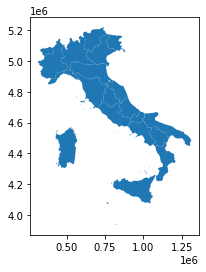

In [5]:
# Impressão do mapa das regiões (conferência)
gpd_it_reg.plot();

In [6]:
# Análise do GeoDataFrame das cidades
gpd_it_com.sample(10)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,SHAPE_LENG,Shape_Le_1,Shape_Area,geometry
3229,1,1,4,0,4,4040,004040,Caraglio,None,0,27587.521940,27587.308607,4.167593e+07,"POLYGON ((378232.787 4924487.424, 378313.787 4..."
5553,1,3,17,0,17,17164,017164,Roè Volciano,None,0,14285.591899,14285.484753,5.820699e+06,"POLYGON ((618688.259 5054666.548, 618663.976 5..."
6664,4,14,70,0,70,70009,070009,Campolieto,None,0,22034.964908,22034.778418,2.442533e+07,"POLYGON ((982028.759 4628007.028, 982049.508 4..."
3237,1,1,3,0,3,3131,003131,Romentino,None,0,29844.538315,29844.315311,1.769063e+07,"POLYGON ((483590.971 5036503.093, 483632.971 5..."
4384,3,12,57,0,57,57038,057038,Mompeo,None,0,19999.729602,19999.561811,1.089222e+07,"POLYGON ((811590.823 4688351.209, 811671.948 4..."
5806,4,13,68,0,68,68020,068020,Lettomanoppello,None,0,24913.203453,24912.996267,1.507040e+07,"POLYGON ((915128.647 4690802.084, 915184.146 4..."
7509,5,20,95,0,95,95087,095087,Suni,None,0,37525.347142,37525.054327,4.746236e+07,"POLYGON ((464345.755 4467392.920, 464377.755 4..."
3309,1,1,4,0,4,4190,004190,Roccaforte Mondovì,None,0,55691.842550,55691.410116,8.461053e+07,"POLYGON ((400529.777 4909303.047, 400588.306 4..."
1518,1,1,96,0,96,96033,096033,Mezzana Mortigliengo,None,0,11989.437110,11989.349795,4.309224e+06,"POLYGON ((436240.383 5054473.454, 436255.350 5..."
2159,1,1,5,0,5,5074,005074,Montaldo Scarampi,None,0,13974.353675,13974.247363,6.634772e+06,"POLYGON ((443893.525 4966410.618, 444000.024 4..."


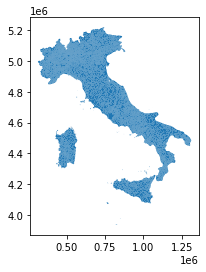

In [7]:
# Impressão do mapa das cidades (conferência)
gpd_it_com.plot();

In [8]:
# Conferência rápida da lista dos santos:
df_santos.sample(10)

,Nome,Ano nasc,Ano morte,Cidade nasc,Região nasc,Cidade morte,Região morte
155,Leone II il Taumaturgo,709,745,Ravenna,Emilia-Romagna,Catania,Sicilia
129,San Giovanni vescovo (Bergamo),DESCONHECIDO,688,DESCONHECIDO,DESCONHECIDO,Bergamo,Lombardia
9,Gaudenzio di Novara,327,418,Ivrea,Piemonte,Novara,Piemonte
41,Glicerio di Milano,DESCONHECIDO,440,DESCONHECIDO,DESCONHECIDO,Milano,Lombardia
276,Donato da Ripacandida,1179,1198,Ripacandida,Basilicata,Petina,Campania
359,Nicola da Tolentino,1245,1305,Sant'Angelo in Pontano,Marche,Tolentino,Marche
441,Bartolomea Capitanio,1807,1833,Lovere,Lombardia,Lovere,Lombardia
288,Silvestro Guzzolini,1177,1267,Osimo,Marche,Fabriano,Marche
242,Giovanni Gualberto,995,1073,Barberino Tavarnelle,Toscana,Barberino Tavarnelle,Toscana
168,Adalgisio di Novara,DESCONHECIDO,848,Novara,Piemonte,Novara,Piemonte


# Ajuste dos dados e tipos

In [9]:
# Verificação de quais regiões da lista dos santos estão presentes no GeoDataFrame do mapa das regiões
r_nasc = pd.merge(df_santos['Região nasc'], gpd_it_reg['DEN_REG'], left_on='Região nasc', right_on='DEN_REG', how='outer')
r_nasc_err = r_nasc[r_nasc['DEN_REG'].isna()]
r_nasc_err['Região nasc'].value_counts()

DESCONHECIDO                    64
EXTERIOR - África                3
EXTERIOR - França                3
EXTERIOR - Anatólia              2
EXTERIOR - Armênia               2
EXTERIOR - atual Albânia         2
Friuli-Venezia Giulia            2
Múltiplos locais                 2
Trentino-Alto Adige/Südtirol     2
Terra Santa                      1
EXTERIOR - Síria                 1
EXTERIOR - Roma Oriental         1
EXTERIOR - atual Alemanha        1
Name: Região nasc, dtype: int64

In [10]:
r_morte = pd.merge(df_santos['Região morte'], gpd_it_reg['DEN_REG'], left_on='Região morte', right_on='DEN_REG', how='outer')
r_morte_err = r_morte[r_morte['DEN_REG'].isna()]
r_morte_err['Região morte'].value_counts()

DESCONHECIDO                    15
EXTERIOR - China                 9
EXTERIOR - França                8
EXTERIOR - Inglaterra            3
Trentino-Alto Adige/Südtirol     3
EXTERIOR - Roma Oriental         2
EXTERIOR - Brasil                2
Friuli-Venezia Giulia            2
Terra Santa                      2
Valle d'Aosta/Vallée d'Aoste     2
EXTERIOR - atual Croácia         1
EXTERIOR - Eritréia              1
EXTERIOR - Sudão                 1
EXTERIOR - Portugal              1
EXTERIOR - Japão                 1
ITÁLIA ANTIGA - Dalmácia         1
Múltiplos locais                 1
EXTERIOR - Espanha               1
EXTERIOR - Marrocos              1
EXTERIOR - Hungria               1
EXTERIOR - Alemanha              1
EXTERIOR - Ucrânia               1
PESSOA VIVA                      1
Name: Região morte, dtype: int64

In [11]:
gpd_it_reg['DEN_REG'].value_counts()

Piemonte                 1
Valle d'Aosta            1
Sicilia                  1
Calabria                 1
Basilicata               1
Puglia                   1
Campania                 1
Molise                   1
Abruzzo                  1
Lazio                    1
Marche                   1
Umbria                   1
Toscana                  1
Emilia-Romagna           1
Liguria                  1
Friuli Venezia Giulia    1
Veneto                   1
Trentino-Alto Adige      1
Lombardia                1
Sardegna                 1
Name: DEN_REG, dtype: int64

In [12]:
# Correções
df_santos['Região nasc'] = df_santos['Região nasc'].str.replace('Trentino-Alto Adige/Südtirol', 'Trentino-Alto Adige')
df_santos['Região morte'] = df_santos['Região morte'].str.replace('Trentino-Alto Adige/Südtirol', 'Trentino-Alto Adige')

df_santos['Região morte'] = df_santos['Região morte'].str.replace('Valle d\'Aosta/Vallée d\'Aoste', 'Valle d\'Aosta')


gpd_it_reg['DEN_REG'] = gpd_it_reg['DEN_REG'].str.replace('Friuli Venezia Giulia', 'Friuli-Venezia Giulia')

In [13]:
# Verificação das correções
r_nasc = pd.merge(df_santos['Região nasc'], gpd_it_reg['DEN_REG'], left_on='Região nasc', right_on='DEN_REG', how='outer')
r_nasc_err = r_nasc[r_nasc['DEN_REG'].isna()]
r_nasc_err['Região nasc'].value_counts()

DESCONHECIDO                 64
EXTERIOR - África             3
EXTERIOR - França             3
EXTERIOR - Anatólia           2
EXTERIOR - Armênia            2
EXTERIOR - atual Albânia      2
Múltiplos locais              2
Terra Santa                   1
EXTERIOR - Síria              1
EXTERIOR - Roma Oriental      1
EXTERIOR - atual Alemanha     1
Name: Região nasc, dtype: int64

In [14]:
r_morte = pd.merge(df_santos['Região morte'], gpd_it_reg['DEN_REG'], left_on='Região morte', right_on='DEN_REG', how='outer')
r_morte_err = r_morte[r_morte['DEN_REG'].isna()]
r_morte_err['Região morte'].value_counts()

DESCONHECIDO                15
EXTERIOR - China             9
EXTERIOR - França            8
EXTERIOR - Inglaterra        3
EXTERIOR - Roma Oriental     2
EXTERIOR - Brasil            2
Terra Santa                  2
EXTERIOR - atual Croácia     1
EXTERIOR - Eritréia          1
EXTERIOR - Sudão             1
EXTERIOR - Portugal          1
EXTERIOR - Japão             1
EXTERIOR - Espanha           1
Múltiplos locais             1
EXTERIOR - Marrocos          1
ITÁLIA ANTIGA - Dalmácia     1
EXTERIOR - Hungria           1
EXTERIOR - Alemanha          1
EXTERIOR - Ucrânia           1
PESSOA VIVA                  1
Name: Região morte, dtype: int64

In [15]:
# Criação de 2 listas auxiliares: regiões que fazem parte da Itália e quais não fazem
lista_reg_n_it = list(r_nasc_err['Região nasc'].unique())
lista_reg_n_it.extend(list(r_morte_err['Região morte'].unique()))
lista_reg_n_it = list(dict.fromkeys(lista_reg_n_it))
lista_reg_it = list(r_nasc[(~(r_nasc['Região nasc'].isin(lista_reg_n_it))) & (~r_nasc['Região nasc'].isna())]['Região nasc'].unique())
lista_reg_it.extend(list(r_morte[(~(r_morte['Região morte'].isin(lista_reg_n_it))) & (~r_morte['Região morte'].isna())]['Região morte'].unique()))
lista_reg_it = list(dict.fromkeys(lista_reg_it))
del(r_nasc, r_nasc_err, r_morte, r_morte_err)

In [16]:
# Verificação de quais cidades da lista dos santos estão presentes no GeoDataFrame do mapa das cidades
c_nasc = pd.merge(df_santos[df_santos['Região nasc'].isin(lista_reg_it)], gpd_it_com[['COMUNE']], left_on='Cidade nasc', right_on='COMUNE')
c_nasc_err = c_nasc[c_nasc['COMUNE'].isna()]
c_nasc_err.value_counts()

Series([], dtype: int64)

In [17]:
c_nasc = pd.merge(df_santos[df_santos['Região nasc'].isin(lista_reg_it)], gpd_it_com[['COMUNE']], left_on='Cidade nasc', right_on='COMUNE')
c_nasc_err = c_nasc[c_nasc['COMUNE'].isna()]
c_nasc_err.value_counts()

Series([], dtype: int64)

In [18]:
c_morte = pd.merge(df_santos[df_santos['Região morte'].isin(lista_reg_it)], gpd_it_com[['COMUNE']], left_on='Cidade morte', right_on='COMUNE')
c_morte_err = c_morte[c_morte['COMUNE'].isna()]
c_morte_err.value_counts()

Series([], dtype: int64)

In [19]:
del(c_nasc, c_nasc_err, c_morte, c_morte_err)

In [20]:
# Conclusão: todas as cidades italianas estão com os nomes corretos e contidos no GeoDataFrame de cidades (comune)

# Análise exploratória

Perguntas iniciais:
1. Em quais regiões da Itália nasceram mais santos? Como ver essa informação em um mapa?
2. Em quais regiões da Itália morreram mais santos? Como ver essa informação em um mapa?
3. Em quais cidades da Itália nasceram mais santos? Como ver essa informação em um mapa?
4. Em quais cidades da Itália morreram mais santos? Como ver essa informação em um mapa?

## 1. Em quais regiões da Itália nasceram mais santos? Como ver essa informação em um mapa?

In [21]:
# Sumarização das quantidade em pivot table
p_reg_n = pd.pivot_table(data=df_santos, index='Região nasc', values='Nome', aggfunc='count')
p_reg_n = p_reg_n.sort_values(by='Nome', ascending=False)
p_reg_n = p_reg_n.rename(columns={'Nome':'Total por região'})
p_reg_n.head(10)

,Total por região
Região nasc,
DESCONHECIDO,64
Lombardia,64
Lazio,53
Toscana,44
Campania,43
Sicilia,30
Piemonte,29
Emilia-Romagna,28
Umbria,27


In [22]:
# Associação entre as quantidades
mapa_reg_n = pd.merge(gpd_it_reg, p_reg_n, left_on='DEN_REG', right_on='Região nasc', how='left')

In [23]:
# Verificação dos campos
mapa_reg_n.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   COD_RIP           20 non-null     int64   
 1   COD_REG           20 non-null     int64   
 2   DEN_REG           20 non-null     object  
 3   Shape_Leng        20 non-null     float64 
 4   Shape_Area        20 non-null     float64 
 5   geometry          20 non-null     geometry
 6   Total por região  19 non-null     float64 
dtypes: float64(3), geometry(1), int64(2), object(1)
memory usage: 1.2+ KB


In [24]:
# Correção dos campos nulos
mapa_reg_n['Total por região'] = mapa_reg_n['Total por região'].fillna(0)

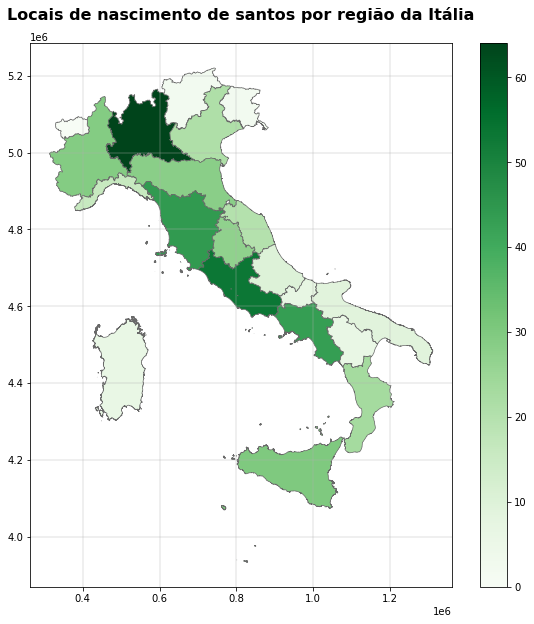

In [25]:
# Plotagem do mapa
mapa_reg_n.plot(column='Total por região', cmap='Greens', figsize=(10,10), edgecolor='dimgray', linewidth=.7, legend=True)
plt.title(label='Locais de nascimento de santos por região da Itália\n', fontsize=16, fontweight='bold')
plt.grid(linewidth=.4);

## 2. Em quais regiões da Itália morreram mais santos? Como ver essa informação em um mapa?

In [26]:
# Sumarização das quantidade em pivot table
p_reg_m = pd.pivot_table(data=df_santos, index='Região morte', values='Nome', aggfunc='count')
p_reg_m = p_reg_m.sort_values(by='Nome', ascending=False)
p_reg_m = p_reg_m.rename(columns={'Nome':'Total por região'})
p_reg_m.head(10)

,Total por região
Região morte,
Lombardia,85
Lazio,79
Campania,54
Toscana,36
Umbria,30
Emilia-Romagna,27
Piemonte,22
Sicilia,20
Marche,20


In [27]:
# Associação entre as quantidades
mapa_reg_m = pd.merge(gpd_it_reg, p_reg_m, left_on='DEN_REG', right_on='Região morte', how='left')

In [28]:
# Verificação dos campos
mapa_reg_m.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   COD_RIP           20 non-null     int64   
 1   COD_REG           20 non-null     int64   
 2   DEN_REG           20 non-null     object  
 3   Shape_Leng        20 non-null     float64 
 4   Shape_Area        20 non-null     float64 
 5   geometry          20 non-null     geometry
 6   Total por região  20 non-null     int64   
dtypes: float64(2), geometry(1), int64(3), object(1)
memory usage: 1.2+ KB


In [29]:
# Não há necessidade de correção de campos nulos

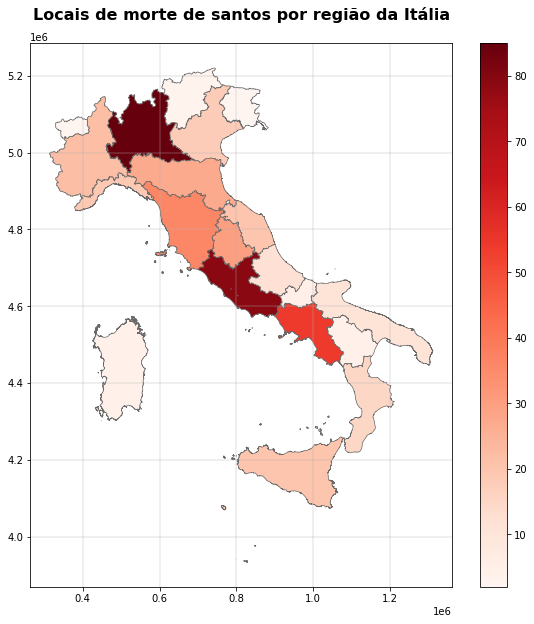

In [30]:
# Plotagem do mapa
mapa_reg_m.plot(column='Total por região', cmap='Reds', figsize=(10,10), edgecolor='dimgray', linewidth=.7, legend=True)
plt.title(label='Locais de morte de santos por região da Itália\n', fontsize=16, fontweight='bold')
plt.grid(linewidth=.4);

## 3. Em quais cidades da Itália nasceram mais santos? Como ver essa informação em um mapa?

In [31]:
# Sumarização das quantidade em pivot table
p_com_n = pd.pivot_table(data=df_santos, index='Cidade nasc', values='Nome', aggfunc='count')
p_com_n = p_com_n.sort_values(by='Nome', ascending=False)
p_com_n = p_com_n.rename(columns={'Nome':'Total por cidade'})
p_com_n.head(10)

,Total por cidade
Cidade nasc,
DESCONHECIDO,64
Roma,27
Milano,20
Firenze,14
Napoli,11
Brescia,9
Verona,7
Palermo,6
Ravenna,5


In [32]:
# Associação entre as quantidades
mapa_com_n = pd.merge(gpd_it_com, p_com_n, left_on='COMUNE', right_on='Cidade nasc', how='left')

In [33]:
# Verificação dos campos
mapa_com_n.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7903 entries, 0 to 7902
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   COD_RIP           7903 non-null   int64   
 1   COD_REG           7903 non-null   int64   
 2   COD_PROV          7903 non-null   int64   
 3   COD_CM            7903 non-null   int64   
 4   COD_UTS           7903 non-null   int64   
 5   PRO_COM           7903 non-null   int64   
 6   PRO_COM_T         7903 non-null   object  
 7   COMUNE            7903 non-null   object  
 8   COMUNE_A          124 non-null    object  
 9   CC_UTS            7903 non-null   int64   
 10  SHAPE_LENG        7903 non-null   float64 
 11  Shape_Le_1        7903 non-null   float64 
 12  Shape_Area        7903 non-null   float64 
 13  geometry          7903 non-null   geometry
 14  Total por cidade  264 non-null    float64 
dtypes: float64(4), geometry(1), int64(7), object(3)
memory usage: 98

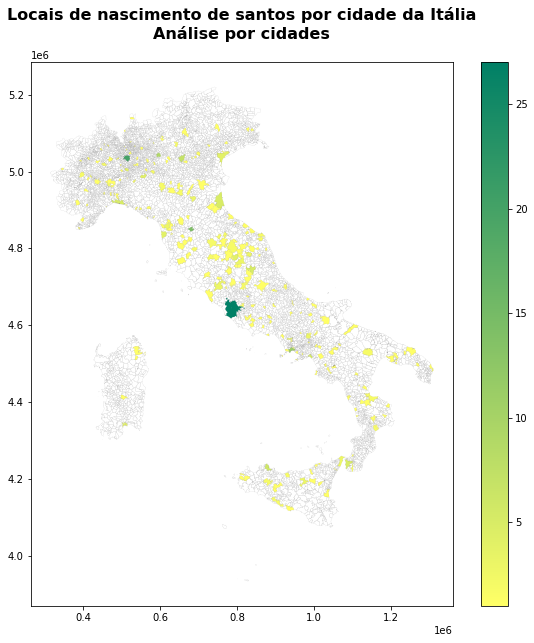

In [34]:
# Plotagem do mapa
mapa_com_n.plot(column='Total por cidade', cmap='summer_r', figsize=(10,10), edgecolor='dimgray', linewidth=.05, legend=True)
plt.title(label='Locais de nascimento de santos por cidade da Itália\nAnálise por cidades\n', fontsize=16, fontweight='bold');
#plt.grid(linewidth=.5);

## 4. Em quais cidades da Itália morreram mais santos? Como ver essa informação em um mapa?

In [35]:
# Sumarização das quantidade em pivot table
p_com_m = pd.pivot_table(data=df_santos, index='Cidade morte', values='Nome', aggfunc='count')
p_com_m = p_com_m.sort_values(by='Nome', ascending=False)
p_com_m = p_com_m.rename(columns={'Nome':'Total por cidade'})
p_com_m.head(10)

,Total por cidade
Cidade morte,
Roma,50
Milano,33
Napoli,15
DESCONHECIDO,15
Firenze,10
Pavia,9
Verona,8
Genova,8
Brescia,7


In [36]:
# Associação entre as quantidades
mapa_com_m = pd.merge(gpd_it_com, p_com_m, left_on='COMUNE', right_on='Cidade morte', how='left')

In [37]:
# Verificação dos campos
mapa_com_m.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7903 entries, 0 to 7902
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   COD_RIP           7903 non-null   int64   
 1   COD_REG           7903 non-null   int64   
 2   COD_PROV          7903 non-null   int64   
 3   COD_CM            7903 non-null   int64   
 4   COD_UTS           7903 non-null   int64   
 5   PRO_COM           7903 non-null   int64   
 6   PRO_COM_T         7903 non-null   object  
 7   COMUNE            7903 non-null   object  
 8   COMUNE_A          124 non-null    object  
 9   CC_UTS            7903 non-null   int64   
 10  SHAPE_LENG        7903 non-null   float64 
 11  Shape_Le_1        7903 non-null   float64 
 12  Shape_Area        7903 non-null   float64 
 13  geometry          7903 non-null   geometry
 14  Total por cidade  243 non-null    float64 
dtypes: float64(4), geometry(1), int64(7), object(3)
memory usage: 98

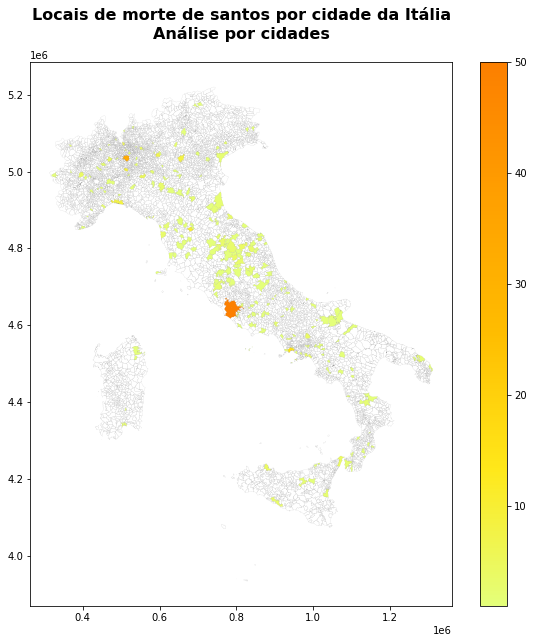

In [38]:
# Plotagem do mapa
mapa_com_m.plot(column='Total por cidade', cmap='Wistia', figsize=(10,10), edgecolor='dimgray', linewidth=.05, legend=True)
plt.title(label='Locais de morte de santos por cidade da Itália\nAnálise por cidades\n', fontsize=16, fontweight='bold');
#plt.grid(linewidth=.1);

Visualizar-se cidades a partir do desenho dos seus territórios nem sempre pode nos dar uma boa idéia da informação, pois há algumas cidades que são muito grandes em território (porém pouco relevantes em informação) e algumas cidades muito difíceis de serem visualizadas pelo seu território.<br><br>
Como poderia ficar a visualização das respostas às perguntas 3 e 4, mas mostrando-se as cidades como pontos no mapa, em que cada cidade possuísse um marcador de tamanho maior, conforme a quantidade de vezes em que possui um registro?

Antes de se prosseguir com esta análise, convém criar-se um mapa de toda a Itália unificada.<br>
Esse novo mapa será usado para se plotar os mapas das novas formas de se responder às perguntas 3 e 4.<br>
Como se pode fazer isso de maneira rápida? Usando-se `unary_union` aplicado ao GeoDataFrame todas as geometrias das regiões do país.<br>
Tem-se então:

In [39]:
gpd_it_full = gpd.GeoDataFrame(data={'LOC':'Italia', 'geometry':gpd_it_reg.geometry.unary_union})

<AxesSubplot:>

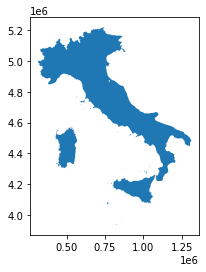

In [40]:
# Testa-se se a união mostra uma informação correta, plotando-se o novo GeoDataFrame:
gpd_it_full.plot()

## 5. Em quais cidades da Itália nasceram mais santos? Como ver essa informação em um mapa que mostre as cidades como pontos?

Antes de tudo, passa-se o GeoDataFrame com os dados de santos por cidades para um novo GeoDataFrame em que as geometrias de cada cidade sejam expressas por <b>PONTOS</b> em vez de <b>MULTI-POLÍGONOS</b>.<br>
Isto se faz com a aplicação de `centroid` à geometria de cada multi-polígono de uma cidade, obtendo-se assim o centróide que representa cada cidade.

In [41]:
mapa_com_n_pt = mapa_com_n.copy()
mapa_com_n_pt.geometry = mapa_com_n_pt.geometry.centroid

### 5a. Tendo-se um mapa das regiões como fundo:

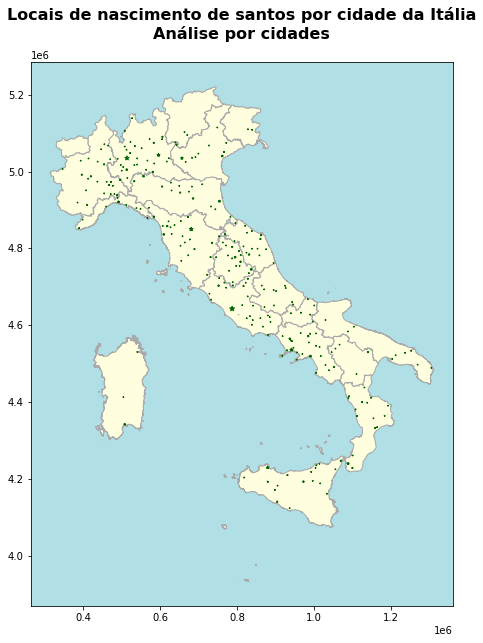

In [42]:
fundo_reg = gpd_it_reg.plot(color='lightyellow', edgecolor='darkgrey', figsize=(10,10))
fundo_reg.set_facecolor('powderblue')

mapa_cidades = mapa_com_n_pt.plot(markersize='Total por cidade', marker='*', color='darkgreen', ax=fundo_reg)
plt.title(label='Locais de nascimento de santos por cidade da Itália\nAnálise por cidades\n', fontsize=16, fontweight='bold');
plt.show()

### 5b. Tendo-se um mapa da Itália completa como fundo:

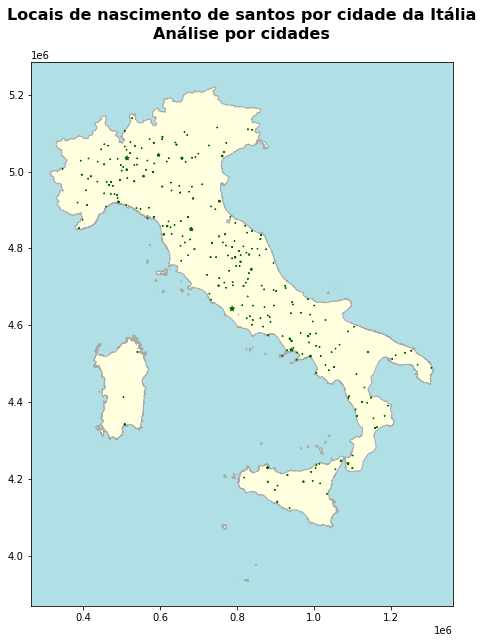

In [43]:
fundo_it = gpd_it_full.plot(color='lightyellow', edgecolor='darkgrey', figsize=(10,10))
fundo_it.set_facecolor('powderblue')

mapa_cidades = mapa_com_n_pt.plot(markersize='Total por cidade', marker='*', color='darkgreen', ax=fundo_it)
plt.title(label='Locais de nascimento de santos por cidade da Itália\nAnálise por cidades\n', fontsize=16, fontweight='bold');
plt.show()

## 6. Em quais cidades da Itália morreram mais santos? Como ver essa informação em um mapa que mostre as cidades como pontos?

Antes de tudo, passa-se o GeoDataFrame com os dados de santos por cidades para um novo GeoDataFrame em que as geometrias de cada cidade sejam expressas por <b>PONTOS</b> em vez de <b>MULTI-POLÍGONOS</b>.<br>
Isto se faz com a aplicação de `centroid` à geometria de cada multi-polígono de uma cidade, obtendo-se assim o centróide que representa cada cidade.

In [44]:
mapa_com_m_pt = mapa_com_m.copy()
mapa_com_m_pt.geometry = mapa_com_m_pt.geometry.centroid

### 6a. Tendo-se um mapa das regiões como fundo:

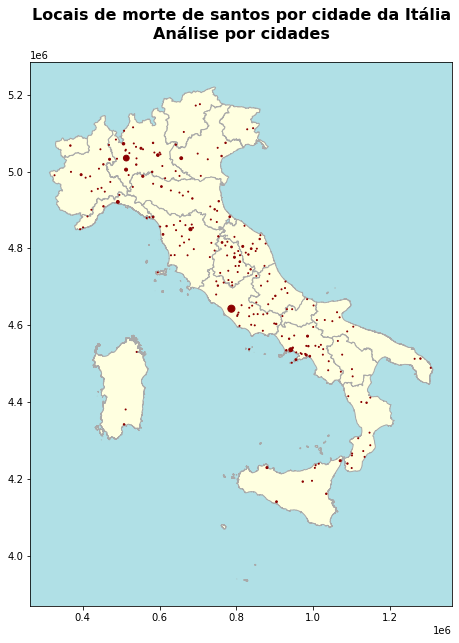

In [45]:
fundo_reg = gpd_it_reg.plot(color='lightyellow', edgecolor='darkgrey', figsize=(10,10))
fundo_reg.set_facecolor('powderblue')

mapa_cidades = mapa_com_m_pt.plot(markersize='Total por cidade', marker='o', color='darkred', ax=fundo_reg)
plt.title(label='Locais de morte de santos por cidade da Itália\nAnálise por cidades\n', fontsize=16, fontweight='bold');
plt.show()

### 6b. Tendo-se um mapa da Itália completa como fundo:

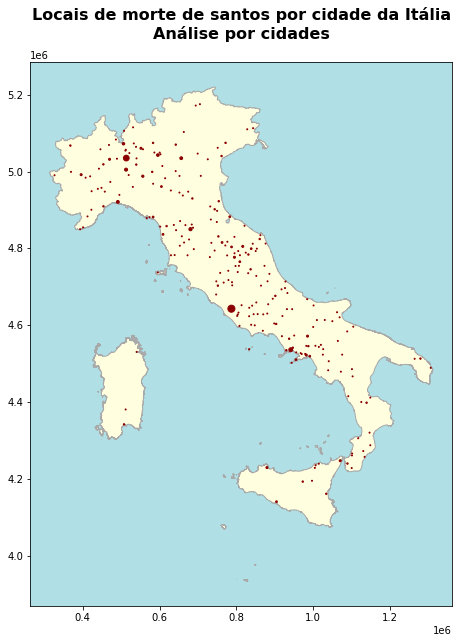

In [46]:
fundo_it = gpd_it_full.plot(color='lightyellow', edgecolor='darkgrey', figsize=(10,10))
fundo_it.set_facecolor('powderblue')

mapa_cidades = mapa_com_m_pt.plot(markersize='Total por cidade', marker='o', color='darkred', ax=fundo_it)
plt.title(label='Locais de morte de santos por cidade da Itália\nAnálise por cidades\n', fontsize=16, fontweight='bold');
plt.show()